In [74]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns

## load in cleaned pickled dataframe

In [75]:
clean_df = pd.read_pickle('data/pickled/cleaned_df.pkl')

In [76]:
# resetting the index
clean_df.reset_index(level=0, inplace=True)

In [77]:
# creaing a column with just the year
clean_df['Year'] = pd.DatetimeIndex(clean_df['Date Occurred']).year

In [78]:
clean_df.head(3)

,Date Occurred,Area ID,Reporting District,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,Status Code,latitude,longitude,Year
0,2010-01-01,21,2156,354,21,M,H,404.0,IC,34.1875,-118.603,2010
1,2010-01-01,5,563,420,0,X,X,104.0,IC,33.737,-118.2967,2010
2,2010-01-01,5,519,510,0,X,X,101.0,IC,33.7926,-118.2468,2010


### Renaming Values for Categorial Variables

In [79]:
clean_df['Victim Descent'] = clean_df['Victim Descent'].replace({'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese',
               'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian',
               'H': 'Latinx', 'I': 'Native', 'J': 'Japanese', 
               'K': 'Korean', 'L': 'Laotian', 'O': 'Other',
               'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian',
               'V': 'Vietnamese', 'W': 'White',  'X': 'Unknown', 'Z':'Asian Indian'})

In [80]:
# checking that it all worked
clean_df.head(1)

,Date Occurred,Area ID,Reporting District,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code,Status Code,latitude,longitude,Year
0,2010-01-01,21,2156,354,21,M,Latinx,404.0,IC,34.1875,-118.603,2010


In [90]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993259 entries, 0 to 1993258
Data columns (total 12 columns):
Date Occurred         datetime64[ns]
Area ID               int64
Reporting District    int64
Crime Code            int64
Victim Age            int64
Victim Sex            object
Victim Descent        object
Premise Code          float64
Status Code           object
latitude              object
longitude             object
Year                  int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 182.5+ MB


## Graphing

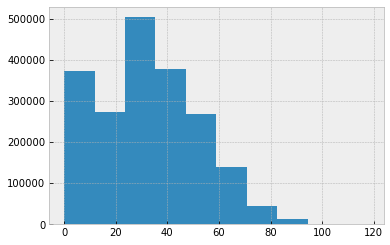

In [81]:
clean_df['Victim Age'].hist()

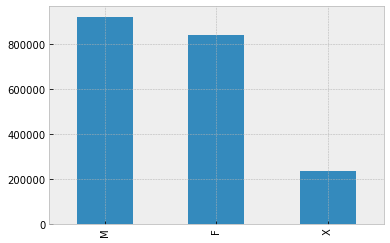

In [82]:
clean_df['Victim Sex'].value_counts(sort=True).nlargest(10).plot.bar()


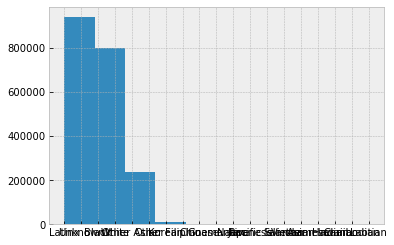

In [83]:
clean_df['Victim Descent'].hist()

In [84]:
clean_df['Victim Descent'].value_counts()

Latinx              685420
White               483035
Black               316944
Unknown             254243
Other               191600
Other Asian          47941
Korean                8703
Filipino              2358
Chinese                884
Native                 872
Japanese               352
Pacific Islander       326
Hawaiian               183
Vietnamese             150
Asian Indian           102
Guamanian               79
Samoan                  31
Cambodian               21
Laotian                 15
Name: Victim Descent, dtype: int64

Text(0, 0.5, 'Number of Crimes')

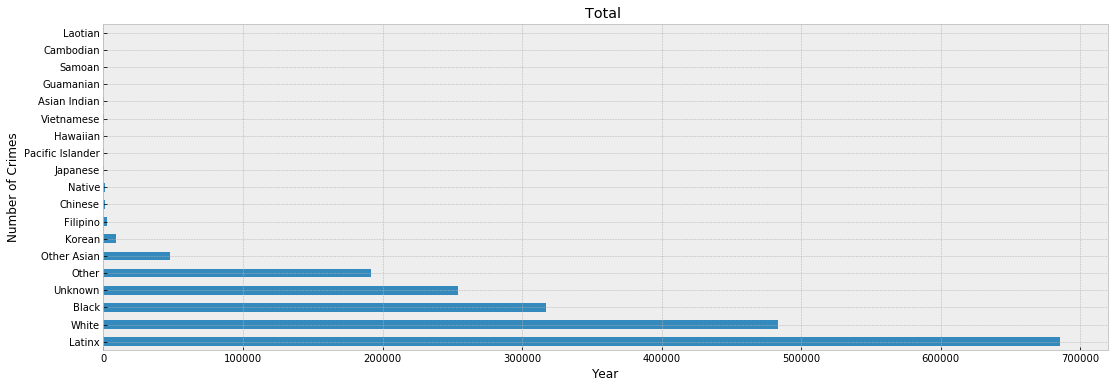

In [85]:
fig, ax = plt.subplots(figsize=(18, 6))
clean_df['Victim Descent'].value_counts().plot(kind='barh')
plt.title('Total ')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# plt.savefig('visualizations/orig_time_data.png', bbox_inches = "tight", pad_inches=.5)


In [86]:
# Top Victim Demographic Each Year



In [91]:
# clean_df.sort_values(by='Year', ascending=True)
# years = sorted(clean_df['Year'].unique())

# victims = clean_df.groupby('Year')['Victim Descent'].value_counts()

# fig, ax = plt.subplots(figsize=(13,6))
# ax.plot(years, victims)
# plt.show()